# Basic Gradient Tree Model

## Import Packages

In [99]:
#Import necessary packages

#For importing data
import pandas as pd

#For mathematical operations
import numpy as np

#For data visualization
import matplotlib.pyplot as plt

## Data Cleansing

In [100]:
#Date import and cleansing

#Import the CSV data
df = pd.read_csv("../data/corporateCreditRatingWithFinancialRatios.csv")

#Check if any missing values
num = len(df)
print("===== Data Cleansing =====")
print("Number of original data:", num)
print("Any missing values? ", df.isnull().values.any())
print()

#Drop unnecessary columns
print("Dropping unnecessary columns ...")
df = df.drop(["Rating Agency", "Corporation", "Ticker", "Binary Rating", "CIK", "SIC Code"], axis=1)

#Eliminate duplicated rows
df = df.drop_duplicates()
print("Duplicated rows dropped: ", num - len(df))

#Print first 5 rows after cleansing the dataset
df.head(5)

===== Data Cleansing =====
Number of original data: 7805
Any missing values?  False

Dropping unnecessary columns ...
Duplicated rows dropped:  2


,Rating,Rating Date,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,A-,2010-07-30,Utils,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,AAA,2010-09-16,BusEq,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,BBB-,2010-11-23,Shops,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,AA-,2010-06-29,Utils,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,A,2010-07-14,Shops,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [101]:
#Format convertion
sector_classes = df["Sector"].unique()
sector_classes.sort()
rating_classes = df["Rating"].unique()
rating_classes.sort()

#Turn categorical column into one-hot vectors
df = pd.get_dummies(df, columns=["Sector"], dtype=float) #Use df.iloc[:,17:29] to extract dummy columns for Sector
df = pd.get_dummies(df, columns=["Rating"], dtype=float) #Use df.iloc[:,29:52] to extract dummy columns for Rating

#Transform strings in Rating Date Column into datetime format
df["Rating Date"] = pd.to_datetime(df["Rating Date"], format="%Y-%m-%d")

#Transform datetime in Rating Date Column into timestamp
df["Rating Date"] = df["Rating Date"].values.astype(np.int64)

#Print first 5 rows after transforming the dataset
df.head(5)

,Rating Date,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,...,Rating_BBB,Rating_BBB+,Rating_BBB-,Rating_C,Rating_CC,Rating_CC+,Rating_CCC,Rating_CCC+,Rating_CCC-,Rating_D
0,1280448000000000000,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1284595200000000000,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1290470400000000000,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1277769600000000000,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1279065600000000000,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration

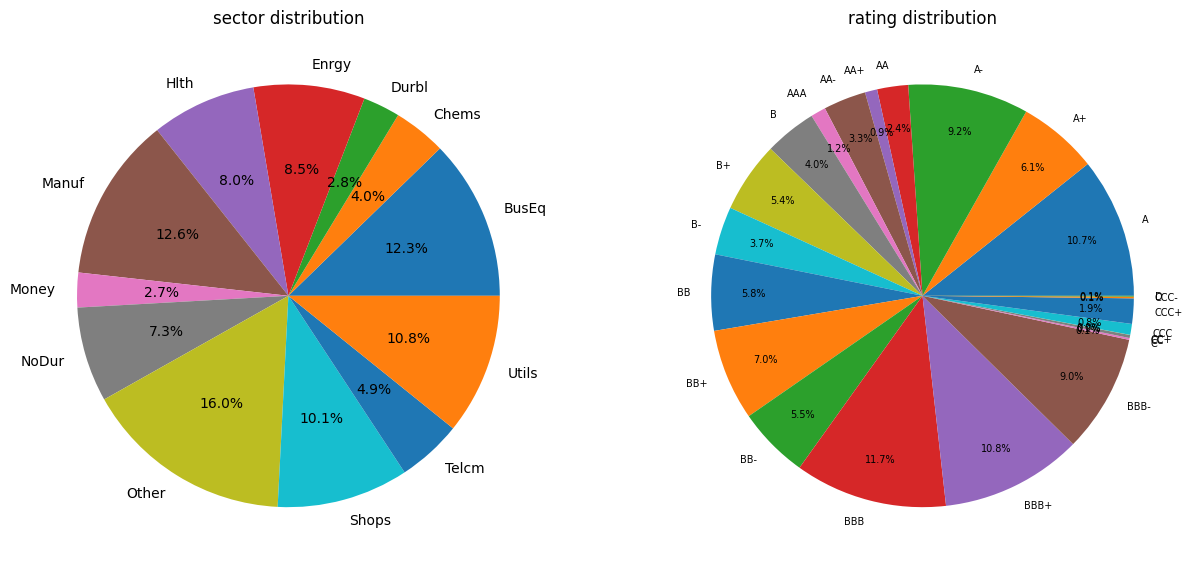

In [119]:
#Plotting the percentages of each sector
sector_distribution = df.iloc[:,17:29].sum()
rating_distribution = df.iloc[:,29:52].sum()

#Define subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

#Subplot for sector distribution
ax1.pie(sector_distribution, labels=sector_classes, autopct='%1.1f%%')
ax1.title.set_text("sector distribution")

#Subplot for rating distribution
ax2.pie(rating_distribution, labels=rating_classes, autopct='%1.1f%%',pctdistance=0.8, textprops={'fontsize': 7})
ax2.title.set_text("rating distribution")

plt.show()

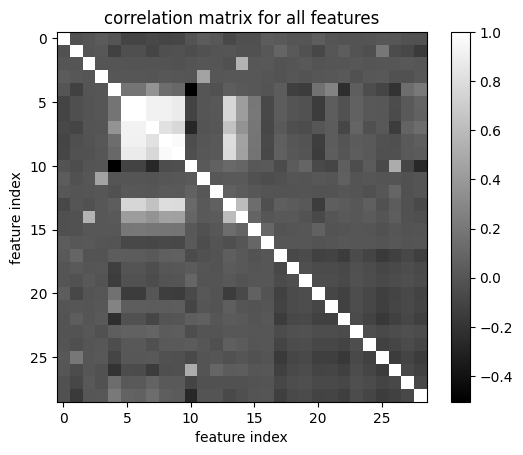

In [103]:
#Plotting the correlation matrix for features
feature_corr_matrix = df.iloc[:,:29].corr()
corr_plot = plt.imshow(feature_corr_matrix, cmap='gray')
plt.xlabel("feature index")
plt.ylabel("feature index")
plt.title("correlation matrix for all features")
plt.colorbar()

plt.show()